# Stochastic Interpolants, Ordinary Differential Equations (ODE) and Stochastic Differential Equations (SDE)  
references:
https://arxiv.org/abs/2303.08797  
https://github.com/malbergo/stochastic-interpolants

---

## Introduction to Stochastic Interpolants

Stochastic interpolants are used to construct generative models that interpolate between two probability distributions. They use stochastic processes to transform a simple distribution (like a Gaussian distribution) into a more complex target distribution.

### Definition

A stochastic interpolant $x_t$ between two probability densities $\rho_0$ and $\rho_1$ is defined by:

$$
x_t = I(t, x_0, x_1) + \gamma(t) z
$$

where:
- $I(t, x_0, x_1)$ is an interpolation function satisfying the following conditions:

$$
I \in C^2([0, 1]; (C^2(\mathbb{R}^d \times \mathbb{R}^d))^d),
$$

with boundary conditions $I(0, x_0, x_1) = x_0$ and $I(1, x_0, x_1) = x_1$, as well as the estimate $\exists C_1 < \infty : |\partial_t I(t, x_0, x_1)| \leq C_1 |x_0 - x_1|$ for all $(t, x_0, x_1) \in [0, 1] \times \mathbb{R}^d \times \mathbb{R}^d$.
- $(x_0, x_1) \sim \nu$, $\nu$ being a particular distribution defined by $\nu(dx_0, dx_1) = \rho_0(x_0) dx_0 \cdot \rho_1(x_1) dx_1$.
- $\gamma(t)$ is a positive function $C^2([0, 1])$ such that $\gamma(0) = \gamma(1) = 0$.
- $z$ is a latent variable, typically Gaussian and independent of $(x_0, x_1)$, i.e., $z \sim N(0, I_d)$ and $z \perp (x_0, x_1)$.

These conditions define the parameters and fundamental properties of stochastic interpolants, which allow for generating approximate samples from $\rho_0$ to $\rho_1$ using controlled stochastic processes.

---

## Transport Equations, Score and Quadratic Objectives

The interpolant allows defining transport equations that move samples from $\rho_0$ to $\rho_1$. The properties of the probability distribution of the stochastic interpolant $x_t$ are specified by the following theorem:

**Theorem (Properties of the stochastic interpolant):** The probability distribution of the stochastic interpolant $x_t$ defined by

$$
x_t = I(t, x_0, x_1) + \gamma(t) z
$$

is absolutely continuous with respect to the Lebesgue measure at any instant $t \in [0, 1]$ and its time-dependent density $\rho(t)$ satisfies $\rho(0) = \rho_0$, $\rho(1) = \rho_1$, $\rho \in C^1([0, 1]; C^p(\mathbb{R}^d))$ for all $p \in \mathbb{N}$, and $\rho(t, x) > 0$ for all $(t, x) \in [0, 1] \times \mathbb{R}^d$. Moreover, $\rho$ solves the transport equation:

$$
\partial_t \rho + \nabla \cdot (b\rho) = 0,
$$

where the velocity $b$ is defined by:

$$
b(t, x) = \mathbb{E}[\dot{x}_t | x_t = x] = \mathbb{E}[\partial_t I(t, x_0, x_1) + \dot{\gamma}(t)z | x_t = x].
$$

This velocity is in $C^0([0, 1]; (C^p(\mathbb{R}^d))^d)$ for all $p \in \mathbb{N}$, and such that:

$$
\forall t \in [0, 1] : \int_{\mathbb{R}^d} |b(t, x)|^2 \rho(t, x) dx < \infty.
$$

The transport equation can be solved either forward in time from the initial condition $\rho(0) = \rho_0$, in which case $\rho(1) = \rho_1$, or backward in time from the final condition $\rho(1) = \rho_1$, in which case $\rho(0) = \rho_0$.

It is sufficient to know the velocity $b$ to solve the transport equation and retrieve the density $\rho_1$.

### Quadratic Objective

The velocity $b$ defined above is the unique minimizer in $C^0([0, 1]; (C^1(\mathbb{R}^d))^d)$ of the following quadratic objective:

$$
L_b[\hat{b}] = \int_0^1 \mathbb{E}\left[\frac{1}{2}|\hat{b}(t, x_t)|^2 - (\partial_t I(t, x_0, x_1) + \dot{\gamma}(t)z) \cdot \hat{b}(t, x_t)\right] dt,
$$

where $x_t$ is defined by:

$$
x_t = I(t, x_0, x_1) + \gamma(t) z,
$$

and the expectation is taken independently over $(x_0, x_1) \sim \nu$ and $z \sim N(0, I_d)$.

Thus, this velocity $b$ can be estimated using a neural network by defining the above loss, providing a way to move from a density $\rho_0$ to $\rho_1$.

Next, we define the score function, strongly linked to the density $\rho$ of our interpolant $x_t$, which is very useful in practice.

### Score

The score of the probability density $\rho$ is given by:

$$
s(t, x) = \nabla \log \rho(t, x) = -\gamma^{-1}(t) \mathbb{E}(z | x_t = x),
$$

and satisfies:

$$
\forall t \in [0, 1] : \int_{\mathbb{R}^d} |s(t, x)|^2 \rho(t, x) dx < \infty.
$$

It is the unique minimizer in $C^1([0, 1]; (C^1(\mathbb{R}^d))^d)$ of the following quadratic objective:

$$
L_s[\hat{s}] = \int_0^1 \mathbb{E}\left[\frac{1}{2}|\hat{s}(t, x_t)|^2 + \gamma^{-1} z \cdot \hat{s}(t, x_t)\right] dt.
$$

Therefore, the score can also be estimated by a neural network using the defined loss.

### Link between Score and Denoising Function

The score of the probability density $\rho$ can also be linked to a denoising function $\eta_z(t, x)$ which is defined as:

$$
\eta_z(t, x) = \mathbb{E}[z | x_t = x],
$$

which implies:

$$
s(t, x) = -\gamma^{-1}(t) \eta_z(t, x).
$$

This denoiser is the minimizer of an expression equivalent to the quadratic objective for the score, given by:

$$
\mathcal{L}_{\eta_z}\left[\hat{\eta}_z\right]=\int_0^1 \overline{\mathbb{E}}\left(\frac{1}{2}\left|\hat{\eta}_z\left(t, x_t\right)\right|^2 - z \cdot \hat{\eta}_z\left(t, x_t\right)\right) dt
$$

The denoiser $\eta_z$ is useful for numerical realizations. In particular, the objective in the above equation is easier to use than the quadratic objective for the score because it does not contain the $\gamma^{-1}(t)$ factor, which requires careful handling when $t$ approaches 0 and 1.

### Fokker-Planck Equations

Access to the score allows us to rewrite the transport equation as forward and backward Fokker-Planck equations:

**Corollary (Fokker-Planck Equations):** For all $\epsilon \in C^0([0, 1])$ with $\epsilon(t) \geq 0$ for all $t \in [0, 1]$, the probability density $\rho$ specified in Theorem 2.6 satisfies:

1. The forward Fokker-Planck equation:
$$
\partial_t \rho + \nabla \cdot (b_F \rho) = \epsilon(t) \Delta \rho, \quad \rho(0) = \rho_0, \tag{1}
$$
where the forward drift $b_F$ is given by $b_F = b - \epsilon s$.

2. The backward Fokker-Planck equation:
$$
-\partial_t \rho + \nabla \cdot (b_B \rho) = \epsilon(t) \Delta \rho, \quad \rho(1) = \rho_1, \tag{2}
$$
where the backward drift $b_B$ is given by $b_B = b + \epsilon s$.

These Fokker-Planck equations describe the evolution of the probability density $\rho$ in the forward or backward direction of time and add a diffusion term controlled by the non-negative function $\epsilon(t)$.

In practical applications, especially in denoising score matching models and generative adversarial networks, the forward Fokker-Planck equation is more frequently used.






## Generative Models

Generative models based on stochastic interpolants involve sampling from $ \rho_0 $ and transforming these samples via the interpolant process to approximate $ \rho_1 $.

The following results directly follow from the Theorem, showing how to design generative models using stochastic processes associated with the Transport Equation, the Forward Fokker-Planck Equation (1), and the Backward Fokker-Planck Equation (2):

**Generative Models**: At any time $ t \in [0, 1] $, the law of the stochastic interpolant $ X_t $ coincides with the law of three processes $ X_t $, $ X^{F}_t $, and $ X^{B}_t $, respectively defined as follows:

1. Solutions of the probability flow associated with the transport equation:
$$
\frac{d}{dt} X_t = b(t, X_t), \quad X_{t=0} \sim \rho_0, \tag{3}
$$
resolved either forward from initial data $ X_{t=0} \sim \rho_0 $ or backward from final data $ X_{t=1} = x_1 \sim \rho_1 $.

2. Solutions of the forward SDE associated with the Forward Fokker-Planck Equation (1):
$$
d X^{F}_t = b_F(t, X^{F}_t) dt + \sqrt{2 \epsilon(t)} dW_t, \quad X^{F}_{t=0} \sim \rho_0 \text{ independent of } W. \tag{4}
$$

3. Solutions of the backward SDE associated with the Backward Fokker-Planck Equation (2):
$$
d X^{B}_t = b_B(t, X^{B}_t) dt + \sqrt{2 \epsilon(t)} dW^{B}_t, \quad W^{B}_t = -W_{1-t}, \quad X^{B}_{t=1} \sim \rho_1 \text{ independent of } W_B. \tag{5}
$$
where the solution to this equation is by definition $ X^{B}_t = z^{F}_{1-t} $, with $ z^{F}_t $ satisfying
$$
d z^{F}_t = - b_B(1 - t, z^{F}_t) dt + \sqrt{2 \epsilon(t)} dW_t,
$$
resolved forward from initial data $ z^{F}_{t=0} \sim \rho_1 $ independently of $ W $.

This result allows for a very straightforward generative modeling. Assuming, for example, that $ \rho_0 $ is a simple density that can be easily sampled (e.g., a Gaussian density or a Gaussian mixture density), we can use ODE (3) or SDE (4) to propagate these samples through time and generate samples from a complex target density $ \rho_1 $.

Furthermore, the stochastic interpolant $ x_t $, the solution $ X_t $ of ODE (3), and the solutions $ X^{F}_t $ and $ X^{B}_t $ of the forward and backward SDEs (4) and (5) are different stochastic processes, but their laws all coincide with $ \rho(t) $ at any time $ t \in [0, 1] $. This is all that matters when applying these processes as generative models.


However, the fact that these processes are different has implications for the accuracy of numerical integration used to sample from them at any $ t $, as well as for the propagation of statistical errors.
It is important to estimate how this statistical estimation error propagates to errors in sample quality, and how error propagation depends on the generative model used.




# Application Case in 2D

We start with the simplest and most useful case where we have two distributions $\rho_1$ and $\rho_0$, with $\rho_0$ being a Gaussian distribution and $\rho_1$ being a target distribution.

The goal is to sample new points according to our target distribution $\rho_1$ using samples from these two distributions.

We will do this as described previously using our interpolator $x_t$ defined by
$$
x_t = I(t, x_0, x_1) + \gamma(t) z.
$$
In this case, we can combine the effects of $x_0$ and the latent variable $z$, which is also Gaussian, and $x_t$ becomes
$$
x_t = \alpha(t) x_0 + \beta(t) x_1, \quad t \in [0, 1],
$$
where:
- $\alpha, \beta: [0, 1] \to \mathbb{R}$ satisfy $\alpha(0) = \beta(1) = 1$, $\alpha(1) = \beta(0) = 0$, and $\alpha, \beta \in C^2([0, 1])$.

For example, we can choose the following expressions for $\alpha$ and $\beta$:

\begin{array}{|l|c|}
\hline
\text{Distribution} & \text{Expression} \\
\hline
\text{Linear} & \alpha(t) = 1 - t \\
 & \beta(t) = t \\
\hline
\text{Trigonometric} & \alpha(t) = \cos\left(\frac{\pi}{2} t\right) \\
 & \beta(t) = \sin\left(\frac{\pi}{2} t\right) \\
\hline
\text{SBDM (Score-Based Model)} & \alpha(t) = \sqrt{1 - t^2} \\
 & \beta(t) = t \\
\hline
\end{array}


In [1]:
!pip install torchdiffeq

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

We begin by defininf the Interpolant fonction.
We specified the path we want to follow. We will see many of them but now we are focusing on the one sided-path where we have a gaussian and a target distribution.

In [2]:
import torch
from torchdiffeq import odeint_adjoint as odeint
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import math
Velocity = torch.nn.Module



def make_It(path, gamma = None, gamma_dot = None, gg_dot = None):
    if path == 'one-sided-linear':

        a      = lambda t: (1-t)
        adot   = lambda t: -1.0
        b      = lambda t: t
        bdot   = lambda t: 1.0

        It   = lambda t, x0, x1: a(t)*x0 + b(t)*x1
        dtIt = lambda t, x0, x1: adot(t)*x0 + bdot(t)*x1

    elif path == 'one-sided-trig':
        a      = lambda t: torch.cos(0.5*math.pi*t)
        adot   = lambda t: -0.5*math.pi*torch.sin(0.5*math.pi*t)
        b      = lambda t: torch.sin(0.5*math.pi*t)
        bdot   = lambda t: 0.5*math.pi*torch.cos(0.5*math.pi*t)


        It   = lambda t, x0, x1: a(t)*x0 + b(t)*x1
        dtIt = lambda t, x0, x1: adot(t)*x0 + bdot(t)*x1

    else:
        raise NotImplementedError("The interpolant you specified is not implemented.")


    return It, dtIt, (a, adot, b, bdot)


We now define the interpolant class that define for a t, a sample $x_0$ from $\rho_0$, a sample $x_1$ from $\rho_1$ the interpolant $x_t$.

In [3]:
class Interpolant(torch.nn.Module):
    """
    Class for all things interpoalnt $x_t = I_t(x_0, x_1) + \gamma(t)z.
    If path is one-sided, then interpolant constructs x_t = a(t) x_0 + b(t) x_1 with x_0 ~ N(0,1).

    path: str,    what type of interpolant to use, e.g. 'linear' for linear interpolant. see fabrics for options
    gamma_type:   what type of gamma function to use, e.g. 'brownian' for $\gamma(t) = \sqrt{t(1-t)}
    """
    def __init__(self, path, gamma_type=None,gamma= None,gamma_dot = None,gg_dot= None,It = None, dtIt= None):
        super(Interpolant, self).__init__()


        self.path = path
        if gamma == None:
            if self.path == 'one-sided-linear' or self.path == 'one-sided-trig':
              gamma_type = None
              self.gamma     = lambda t: torch.zeros(1) ### no gamma
              self.gamma_dot = lambda t: torch.zeros(1) ### no gamma
              self.gg_dot    = lambda t: torch.zeros(1) ### no gamma



        self.It, self.dtIt, ab = make_It(path, self.gamma, self.gamma_dot, self.gg_dot)
        self.a, self.adot, self.b, self.bdot = ab[0], ab[1], ab[2], ab[3]


    def calc_xt(self, t, x0, x1):
        if self.path =='one-sided-linear' or self.path == 'mirror' or self.path=='one-sided-trig':
            return self.It(t, x0, x1)
        else:
            z = torch.randn(x0.shape).to(t)
            return self.It(t, x0, x1) + self.gamma(t)*z, z


We now need to define the losses that we are going to minimise during the training.

We use the previous losses that we defined and estimate $\hat{b}$ of b by minimizing
the empirical risk.

$$
\hat{\mathcal{L}}_b(\hat{b})=\frac{1}{N} \sum_{i=1}^N\left(\frac{1}{2}\left|\hat{b}\left(t_i, x_{t_i}^i\right)\right|^2-\hat{b}\left(t_i, x_{t_i}^i\right) \cdot\left(\partial_t I\left(t_i, x_0^i, x_1^i\right)+\dot{\gamma}\left(t_i\right) z^i\right)\right),
$$
We also define the estimates of $\hat{\eta_z}$ and $\hat{s}$ by minimizing the empirical risks
$$
\hat{\mathcal{L}}_{\eta_z}(\hat{\eta_z})=\frac{1}{N} \sum_{i=1}^N\left(\frac{1}{2}\left|\hat{\eta_z}\left(t_i, x_{t_i}^i\right)\right|^2- z^i \cdot \hat{\eta_z}\left(t_i, x_{t_i}^i\right) \right)
$$
$$
\hat{\mathcal{L}}_s(\hat{s})=\frac{1}{N} \sum_{i=1}^N\left(\frac{1}{2}\left|\hat{s}\left(t_i, x_{t_i}^i\right)\right|^2+\gamma\left(t_i\right)^{-1} \hat{s}\left(t_i, x_{t_i}^i\right) \cdot z^i\right)
$$

In these formula, $\gamma$ need to be replace by $\alpha$ because it's now the coefficient factor in front of the gaussian.

In [4]:
def loss_per_sample_b_one_sided(b, x0, x1, t, interpolant):
    """Compute the (variance-reduced) loss on an individual sample via antithetic sampling."""

    xt = interpolant.calc_xt(t, x0, x1)
    xt, t = xt.unsqueeze(0), t.unsqueeze(0)
    dtIt        = interpolant.dtIt(t, x0, x1)
    gamma_dot   = interpolant.gamma_dot(t)
    bt         = b(xt, t)
    loss        = 0.5*torch.sum(bt**2) - torch.sum((dtIt) * bt)
    return loss



def loss_per_sample_one_sided_s(s, x0, x1, t, interpolant):
    """Compute the loss on an individual sample via antithetic samples for x_t = sqrt(1-t)z + sqrt(t) x1 where z=x0."""
    xt, z = interpolant.calc_xt(t, x0, x1)
    xtt = xt.unsqueeze(0), t.unsqueeze(0)
    st = s(xt, t)
    alpha = interpolant.a(t)
    loss = 0.5 * torch.sum(st**2) + (1 / alpha) * torch.sum(st * x0)
    return loss

def loss_per_sample_one_sided_eta(eta, x0, x1, t, interpolant):
    """Compute the loss on an individual sample via samples for x_t = alpha(t)z + beta(t) x1 where z=x0."""
    xt = interpolant.calc_xt(t, x0, x1)
    xt, t = xt.unsqueeze(0), t.unsqueeze(0)
    etat = eta(xt, t)
    loss = 0.5 * torch.sum(etat**2) + torch.sum(etat * x0)
    return loss


def make_loss(loss, bvseta, x0,x1, t, interpolant):
    """Convert a sample loss into a batched loss."""
    in_dims_set = (None, 0, 0, 0, None)
    batched_loss = torch.vmap(loss, in_dims=in_dims_set, randomness='different')
    loss_val = batched_loss(bvseta, x0, x1, t, interpolant)
    loss_val = loss_val.mean()
    return loss_val


We now have access to the estimates $\hat{b}$, $\hat{\eta_z}$ and $\hat{s}$ by minimizing the previous loss. It can be noted that we only need to train $\hat{b}$ and $\hat{\eta_z}$ as we can recover the score $s$ easily by the formula $$
s(t, x) = -\gamma^{-1}(t) \eta_z(t,x).
$$
But it can be interested to see with which estimator we have the better results on larger and more complex data.

We now define the useful class for sampling.
We use the (2), (3), (4) equations defined earlier. We can use (2), and (3), (4) with $\epsilon=0$ for sampling with an ODE, or (2) and (3) for sampling with a SDE.
We can also choose different method of sampling (3) and (4) like 'Euler Maryama' or 'Heun'.

In [5]:
### sampling with (3), (4) : SDE

class SFromEta(torch.nn.Module):
    """Class for turning a noise model into a score model."""
    def __init__(
        self,
        eta,
        gamma,
    ) -> None:
        super(SFromEta, self).__init__()
        self.eta = eta
        self.gamma = gamma

    def forward(self, x, t):
        val = (self.eta(x,t) / self.gamma(t))
        return val


class SDEIntegrator(torch.nn.Module):
    def __init__(self, b, s = None,eps=torch.tensor(0),interpolant=None,n_save=4,start_end = (0, 1), n_step = 100):
        super(SDEIntegrator, self).__init__()
        self.b =b
        self.s=s
        self.eps = eps
        self.n_save = n_save
        self.n_step = n_step
        self.start_end = start_end
        self.start, self.end = self.start_end
        self.ts = torch.linspace(self.start, self.end, self.n_step)
        self.dt = self.ts[1] - self.ts[0]
        self.interpolant = interpolant
        if self.s is None or self.eps == 0:
            self.bf = self.b
        else:
            self.bf = lambda x, t: self.b(x, t) + self.eps * self.s(x, t)


    def step_forward_heun(self, x: torch.tensor, t: torch.tensor) -> torch.tensor:
        """Heun Step -- see https://arxiv.org/pdf/2206.00364.pdf, Alg. 2"""
        dW = torch.sqrt(self.dt) * torch.randn_like(x)
        xhat = x + torch.sqrt(2 * self.eps) * dW
        K1 = self.bf(xhat, t + self.dt)
        xp = xhat + self.dt * K1
        K2 = self.bf(xp, t + self.dt)
        return xhat + 0.5 * self.dt * (K1 + K2)

    def step_forward(self, x: torch.tensor, t: torch.tensor) -> torch.tensor:
        """Euler-Maruyama."""
        dW = torch.sqrt(self.dt) * torch.randn_like(x)
        return x + self.bf(x, t) * self.dt + torch.sqrt(2 * self.eps) * dW

    def rollout_forward(self, init: torch.tensor, method: str = 'heun') -> torch.tensor:
        """Solve the forward-time SDE to generate a batch of samples."""
        save_every = int(self.n_step / self.n_save)
        xs = torch.zeros((self.n_save, *init.shape)).to(init.device)
        x = init
        self.dt = self.dt.to(init.device)

        save_counter = 0

        for ii, t in enumerate(self.ts[:-1]):
            t = t.to(init.device).unsqueeze(0)
            if method == 'heun':
                x = self.step_forward_heun(x, t)
            else:
                x = self.step_forward(x, t)

            if (ii + 1) % save_every == 0:
                xs[save_counter] = x
                save_counter += 1

        xs[save_counter] = x

        return xs


### Sampling with (2) : ODE
def compute_div(f,x,t):
    """Compute the divergence of f(x,t) with respect to x, assuming that x is batched. Assumes data is [bs, d]"""
    bs = x.shape[0]
    with torch.set_grad_enabled(True):
        x.requires_grad_(True)
        t.requires_grad_(True)
        f_val = f(x, t)
        divergence = 0.0
        for i in range(x.shape[1]):
            divergence += \
                    torch.autograd.grad(
                            f_val[:, i].sum(), x, create_graph=True
                        )[0][:, i]

    return divergence.view(bs)


class PFlowRHS(torch.nn.Module):
    def __init__(self, b, interpolant, sample_only=False):
        super(PFlowRHS, self).__init__()
        self.b = b
        self.interpolant = interpolant
        self.sample_only = sample_only


    def setup_rhs(self):
        def rhs(x: torch.tensor, t: torch.tensor):
            self.b.to(x)

            t = t.unsqueeze(0)
            return self.b(x,t)

        self.rhs = rhs


    def forward(self, t, states):
        x = states[0]
        if self.sample_only:
            return (self.rhs(x, t), torch.zeros(x.shape[0]).to(x))
        else:
            return (self.rhs(x, t), -compute_div(self.rhs, x, t))

    def reverse(self, t: torch.tensor, states):
        x = states[0]
        if self.sample_only:
            return (-self.rhs(x, t), torch.zeros(x.shape[0]).to(x))
        else:
            return (-self.rhs(x, t), compute_div(self.rhs, x, t))

@dataclass
class PFlowIntegrator:
    b: Velocity
    method: str
    interpolant: Interpolant
    start_end: tuple = (0.0, 1.0)
    n_step: int = 5
    atol: torch.tensor = 1e-5
    rtol: torch.tensor = 1e-5
    sample_only: bool  = False
    mirror:      bool  = False


    def __post_init__(self) -> None:

        self.rhs = PFlowRHS(b=self.b, interpolant=self.interpolant, sample_only=self.sample_only)
        self.rhs.setup_rhs()

        self.start, self.end = self.start_end[0], self.start_end[1]


    def rollout(self, x0, reverse=False):
        if reverse:
            integration_times = torch.linspace(self.end, self.start, self.n_step).to(x0)
        else:
            integration_times = torch.linspace(self.start, self.end, self.n_step).to(x0)
        dlogp = torch.zeros(x0.shape[0]).to(x0)

        state = odeint(
            self.rhs,
            (x0, dlogp),
            integration_times,
            method=self.method,
            atol=[self.atol, self.atol],
            rtol=[self.rtol, self.rtol]
        )

        x, dlogp = state
        return x, dlogp


We now define our distribution.


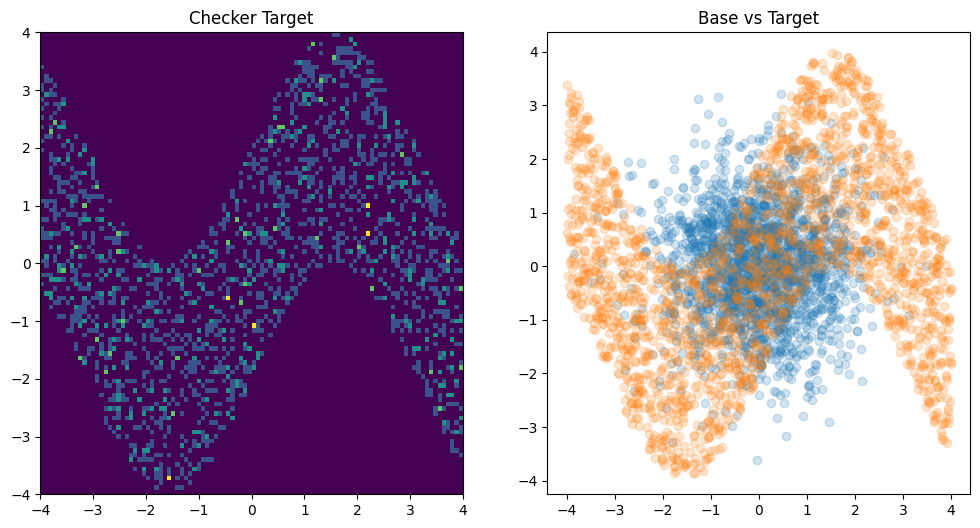

Target Batch Shape: (2000, 2)
Base Batch Shape: (2000, 2)


In [6]:
# We first define a usefull class for the gaussian distribution.
class Prior(torch.nn.Module):
    def forward(self, batch_size):
        raise NotImplementedError()
    def log_prob(self, x):
        raise NotImplementedError()
    def draw(self, batch_size):
        return self.forward(batch_size)

class SimpleNormal(Prior):
    def __init__(self, loc, var, requires_grad=False):
        super().__init__()
        if requires_grad:
            loc.requires_grad_()
            var.requires_grad_()
        self.loc = loc
        self.var = var
        self.dist = torch.distributions.normal.Normal(
            torch.flatten(self.loc), torch.flatten(self.var))
        self.shape = loc.shape

    def log_prob(self, x):
        logp = self.dist.log_prob(x.reshape(x.shape[0], -1))
        return torch.sum(logp, dim=1)

    def forward(self, batch_size):
        x = self.dist.sample((batch_size,))
        return torch.reshape(x, (-1,) + self.shape)

    def rsample(self, batch_size):
        x = self.dist.rsample((batch_size,))
        return torch.reshape(x, (-1,) + self.shape)


# We define our target distribution.
def target(bs):
    x1 = torch.rand(bs) * 4 - 2
    x2_ = torch.rand(bs) * 4 - 2
    x2 = 1/2*x2_ + torch.sin(x1 * 2)
    return torch.cat([x1[:, None], x2[:, None]], 1) * 2




# We define a class to put our data into dataloader.
class SampleDataset(Dataset):
    def __init__(self, distribution, size):
        self.distribution = distribution
        self.size = size

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        return self.distribution(1).squeeze(0)




# We now generate our data and put them into dataloader and we can visualize them.
ndim = 2
batch_size = 2000
dataset_size = 20000
target_distribution = target
base_distribution = SimpleNormal(torch.zeros(ndim), torch.ones(ndim))


target_dataset = SampleDataset(target_distribution, dataset_size)
base_dataset = SampleDataset(base_distribution, dataset_size)


target_loader = DataLoader(target_dataset, batch_size=batch_size, shuffle=True)
base_loader = DataLoader(base_dataset, batch_size=batch_size, shuffle=True)

target_samples = next(iter(target_loader)).numpy()
base_samples = next(iter(base_loader)).numpy()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist2d(target_samples[:, 0], target_samples[:, 1], bins=100, range=[[-4, 4], [-4, 4]])
ax[0].set_title("Checker Target")

ax[1].scatter(base_samples[:, 0], base_samples[:, 1], label='base', alpha=0.2)
ax[1].scatter(target_samples[:, 0], target_samples[:, 1], alpha=0.2)
ax[1].set_title("Base vs Target")

plt.show()

print("Target Batch Shape:", target_samples.shape)
print("Base Batch Shape:", base_samples.shape)


We define our model to estimate $b$ and $\eta$.  

In [7]:
class FullyConnectedModel(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim, time_embed_dim):
        super(FullyConnectedModel, self).__init__()
        self.time_embed = nn.Linear(1, time_embed_dim)
        layers = []
        prev_dim = input_dim + time_embed_dim
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            prev_dim = hidden_dim
        layers.append(nn.Linear(prev_dim, output_dim))
        self.network = nn.Sequential(*layers)

    def forward(self, x, t):
        t_embed = self.time_embed(t.unsqueeze(-1))
        x = x.view(x.size(0), -1)
        t_embed = t_embed.expand(x.size(0), -1)
        x = torch.cat([x, t_embed], dim=-1)
        return self.network(x)


def grab(var):
    return var.detach().cpu().numpy()





We now define our train function and the hyperparameters and we train our models.

In [11]:
def train(epochs, b, eta, data_loader, loss_b,loss_eta, opt_b, opt_eta, sched_b, sched_eta, device):
    n = len(data_loader)
    b.train()
    eta.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for x1 in data_loader:
            x1 = x1.to(device)
            x0 = base_distribution(x1.shape[0]).to(device)
            ts  = torch.rand(size=(x1.shape[0],)).to(device)
            loss_b_val = make_loss(loss_per_sample_b_one_sided, b,  x0, x1, ts, interpolant)
            loss_eta_val = make_loss(loss_per_sample_one_sided_eta, eta, x0, x1, ts, interpolant)
            loss = loss_b_val + loss_eta_val
            epoch_loss += loss.item()/n
            opt_b.zero_grad()
            opt_eta.zero_grad()
            loss_b_val.backward()
            loss_eta_val.backward()
            opt_b.step()
            opt_eta.step()
            sched_b.step()
            sched_eta.step()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss}')



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ndim = 2
hidden_dims = [256, 256, 256,256]
time_embed_dim = 20
b = FullyConnectedModel(input_dim=ndim, hidden_dims=hidden_dims, output_dim=ndim, time_embed_dim=time_embed_dim).to(device)
eta = FullyConnectedModel(input_dim=ndim, hidden_dims=hidden_dims, output_dim=ndim, time_embed_dim=time_embed_dim).to(device)

base_lr  = 2e-3
opt_b     = torch.optim.Adam(  b.parameters(), lr=base_lr)
opt_eta   = torch.optim.Adam(eta.parameters(), lr=base_lr)
sched_b   = torch.optim.lr_scheduler.StepLR(optimizer=  opt_b, step_size=1500, gamma=0.4)
sched_eta = torch.optim.lr_scheduler.StepLR(optimizer=opt_eta, step_size=1500, gamma=0.4)


epochs = 50
path='one-sided-linear'
interpolant  = Interpolant(path='one-sided-linear')
loss_b = loss_per_sample_b_one_sided
loss_eta = loss_per_sample_one_sided_eta
train(epochs, b, eta, target_loader, loss_b,loss_eta, opt_b, opt_eta, sched_b, sched_eta, device)

Epoch 1/50, Loss: -0.9993589662946759
Epoch 2/50, Loss: -1.8970089077949521
Epoch 3/50, Loss: -2.1846288681030273
Epoch 4/50, Loss: -2.369887781143188
Epoch 5/50, Loss: -2.44537570476532
Epoch 6/50, Loss: -2.4598465919494625
Epoch 7/50, Loss: -2.539408755302429
Epoch 8/50, Loss: -2.511427474021912
Epoch 9/50, Loss: -2.5330180168151855
Epoch 10/50, Loss: -2.527278423309326
Epoch 11/50, Loss: -2.548335027694702
Epoch 12/50, Loss: -2.56226909160614
Epoch 13/50, Loss: -2.6028987169265747
Epoch 14/50, Loss: -2.5785343170166017
Epoch 15/50, Loss: -2.5730824470520015
Epoch 16/50, Loss: -2.5669571638107302
Epoch 17/50, Loss: -2.5552580118179327
Epoch 18/50, Loss: -2.5865288734436036
Epoch 19/50, Loss: -2.6338021755218506
Epoch 20/50, Loss: -2.5966459751129145
Epoch 21/50, Loss: -2.564435648918152
Epoch 22/50, Loss: -2.6420555114746094
Epoch 23/50, Loss: -2.573392963409424
Epoch 24/50, Loss: -2.623615097999573
Epoch 25/50, Loss: -2.6109851360321046
Epoch 26/50, Loss: -2.6290188312530516
Epoch 2

With our trained model, we can now sample new data from the target distribution with either SDE or ODE.

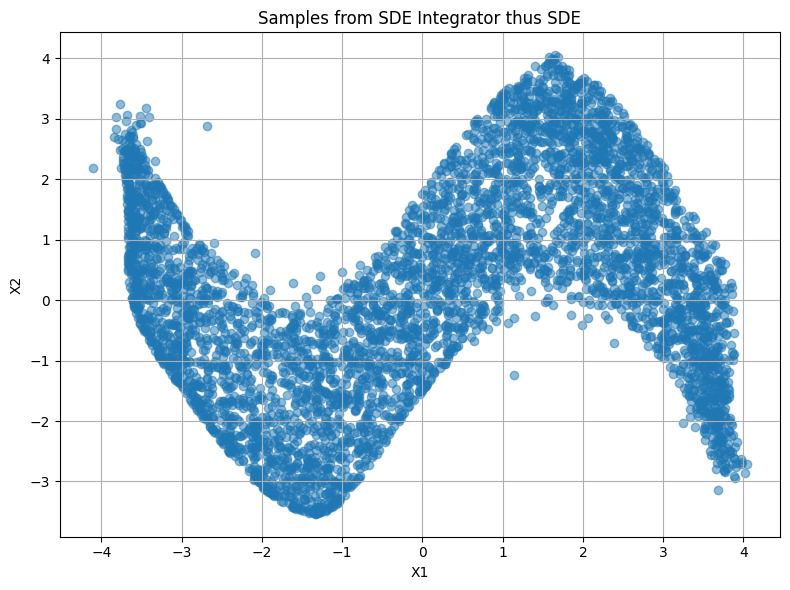

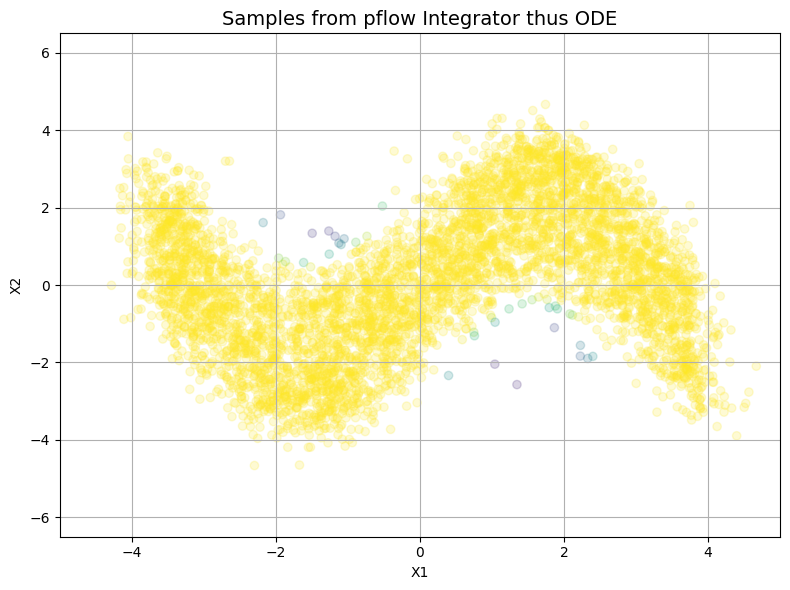

In [12]:
s = SFromEta(eta, interpolant.a)
sde_flow = SDEIntegrator(b=b, s=s, eps=torch.tensor(0.1), n_save=4, start_end=(0.0001, 0.999), n_step=100).to(device)
pflow = PFlowIntegrator(b=b,  method='dopri5', interpolant=interpolant, n_step=3)
bs = 5000
with torch.no_grad():
    x0_tests = base_distribution(bs).to(device)
    xfs_sde = sde_flow.rollout_forward(x0_tests, 'heun')
    xf_sde = grab(xfs_sde[-1].squeeze())

    xfs_pflow, dlogp_pflow = pflow.rollout(x0_tests)
    xf_pflow = grab(xfs_pflow[-1].squeeze())

    x0_tests=x0_tests.cpu()
    logp0 = base_distribution.log_prob(x0_tests)

    logpx_pflow = grab( + dlogp_pflow[-1].squeeze())




plt.figure(figsize=(8, 6))
plt.scatter(xf_sde[:, 0], xf_sde[:, 1], alpha=0.5)
plt.title('Samples from SDE Integrator thus SDE')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(
    xf_pflow[:, 0], xf_pflow[:, 1],
    c=grab(torch.exp(torch.tensor(logpx_pflow))),
    vmin=0.0, vmax=0.05, alpha=0.2
)
plt.xlim(-5, 5)
plt.ylim(-6.5, 6.5)
plt.title('Samples from pflow Integrator thus ODE', fontsize=14)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.tight_layout()
plt.show()

We have seen that from a gaussian distribution we can retrieve any target distribution. We will ssee now that we can also start from an other distribution and going from one to another.


We now need to use the more general formula for our interpolant $x_t$.
Now we use :
$$x_t = \alpha(t) x_0 + \beta(t) x_1 + \gamma(t) z, \quad t \in [0, 1]$$
-with $\gamma(0)  = \gamma(1) = 0 $ and $\gamma(t) > 0, \quad t \in [0, 1]$


We now have to add new paths in the interpolant function  and class.

We can choose several path to go from $\rho_0$ to $\rho_1$.

We can summarize different possibilities in the following table :

\begin{array}{|l|c|}
\hline
\text{Stochastic Interpolant} & \text{Expression} \\
\hline
\text{Linear} & \alpha(t) = 1 - t \\
\text{} & \beta(t) = t \\
\text{} & \gamma(t) = \sqrt{a t (1 - t)} \\
\hline
\text{Trigonometric} & \alpha(t) = \cos\left(\frac{\pi}{2} t\right) \\
\text{} & \beta(t) = \sin\left(\frac{\pi}{2} t\right) \\
\text{} & \gamma(t) = \sqrt{a t (1 - t)} \\
\hline
\text{Encoder-Decoder} & \alpha(t) = \cos^2(\pi t)\mathbf{1}_{[0, \frac{1}{2})}(t) \\
\text{} & \beta(t) = \cos^2(\pi t)\mathbf{1}_{(\frac{1}{2}, 1]}(t) \\
\text{} & \gamma(t) = \sin^2(\pi t) \\
\hline
\end{array}

In [13]:
# We redefine the interpolant functions with more diversity of path and possibilities for gamma if one want to study the effect of a specific choice.

def make_It(path='linear', gamma = None, gamma_dot = None, gg_dot = None):
    """gamma function must be specified if using the trigonometric interpolant"""

    if path == 'linear':

        a      = lambda t: (1-t)
        adot   = lambda t: -1.0
        b      = lambda t: t
        bdot   = lambda t: 1.0
        It   = lambda t, x0, x1: a(t)*x0 + b(t)*x1
        dtIt = lambda t, x0, x1: adot(t)*x0 + bdot(t)*x1

    elif path == 'trig':
        if gamma == None:
            raise TypeError("Gamma function must be provided for trigonometric interpolant!")
        a    = lambda t: torch.sqrt(1 - gamma(t)**2)*torch.cos(0.5*math.pi*t)
        b    = lambda t: torch.sqrt(1 - gamma(t)**2)*torch.sin(0.5*math.pi*t)
        adot = lambda t: -gg_dot(t)/torch.sqrt(1 - gamma(t)**2)*torch.cos(0.5*math.pi*t) \
                                - 0.5*math.pi*torch.sqrt(1 - gamma(t)**2)*torch.sin(0.5*math.pi*t)
        bdot = lambda t: -gg_dot(t)/torch.sqrt(1 - gamma(t)**2)*torch.sin(0.5*math.pi*t) \
                                + 0.5*math.pi*torch.sqrt(1 - gamma(t)**2)*torch.cos(0.5*math.pi*t)

        It   = lambda t, x0, x1: a(t)*x0 + b(t)*x1
        dtIt = lambda t, x0, x1: adot(t)*x0 + bdot(t)*x1

    elif path == 'encoding-decoding':

        a    = lambda t: torch.where(t <= 0.5, torch.cos(math.pi*t)**2, torch.tensor(0.))
        adot = lambda t: torch.where(t <= 0.5, -2*math.pi*torch.cos(math.pi*t)*torch.sin(math.pi*t), torch.tensor(0.))
        b    = lambda t: torch.where(t > 0.5,  torch.cos(math.pi*t)**2, 0.)
        bdot = lambda t: torch.where(t > 0.5,  -2*math.pi*torch.cos(math.pi*t)*torch.sin(math.pi*t), torch.tensor(0.))
        It   = lambda t, x0, x1: a(t)*x0 + b(t)*x1
        dtIt = lambda t, x0, x1: adot(t)*x0 + bdot(t)*x1

    elif path == 'one-sided-linear':

        a      = lambda t: (1-t)
        adot   = lambda t: -1.0
        b      = lambda t: t
        bdot   = lambda t: 1.0

        It   = lambda t, x0, x1: a(t)*x0 + b(t)*x1
        dtIt = lambda t, x0, x1: adot(t)*x0 + bdot(t)*x1

    elif path == 'one-sided-trig':

        a      = lambda t: torch.cos(0.5*math.pi*t)
        adot   = lambda t: -0.5*math.pi*torch.sin(0.5*math.pi*t)
        b      = lambda t: torch.sin(0.5*math.pi*t)
        bdot   = lambda t: 0.5*math.pi*torch.cos(0.5*math.pi*t)


        It   = lambda t, x0, x1: a(t)*x0 + b(t)*x1
        dtIt = lambda t, x0, x1: adot(t)*x0 + bdot(t)*x1

    elif path == 'mirror':
        if gamma == None:
            raise TypeError("Gamma function must be provided for mirror interpolant!")

        a     = lambda t: gamma(t)
        adot  = lambda t: gamma_dot(t)
        b     = lambda t: torch.tensor(1.0)
        bdot  = lambda t: torch.tensor(0.0)

        It    = lambda t, x0, x1: b(t)*x1 + a(t)*x0
        dtIt  = lambda t, x0, x1: adot(t)*x0

    elif path == 'custom':
        return None, None, None

    else:
        raise NotImplementedError("The interpolant you specified is not implemented.")


    return It, dtIt, (a, adot, b, bdot)


def make_gamma(gamma_type = 'brownian', aval = None):
    """
    returns callable functions for gamma, gamma_dot,
    and gamma(t)*gamma_dot(t) to avoid numerical divide by 0s,
    e.g. if one is using the brownian (default) gamma.
    """
    if gamma_type == 'brownian':
        gamma = lambda t: torch.sqrt(t*(1-t))
        gamma_dot = lambda t: (1/(2*torch.sqrt(t*(1-t)))) * (1 -2*t)
        gg_dot = lambda t: (1/2)*(1-2*t)

    elif gamma_type == 'a-brownian':
        gamma = lambda t: torch.sqrt(a*t*(1-t))
        gamma_dot = lambda t: (1/(2*torch.sqrt(a*t*(1-t)))) * a*(1 -2*t)
        gg_dot = lambda t: (a/2)*(1-2*t)

    elif gamma_type == 'zero':
        gamma = gamma_dot = gg_dot = lambda t: torch.zeros_like(t)

    elif gamma_type == 'bsquared':
        gamma = lambda t: t*(1-t)
        gamma_dot = lambda t: 1 -2*t
        gg_dot = lambda t: gamma(t)*gamma_dot(t)

    elif gamma_type == 'sinesquared':
        gamma = lambda t: torch.sin(math.pi * t)**2
        gamma_dot = lambda t: 2*math.pi*torch.sin(math.pi * t)*torch.cos(math.pi*t)
        gg_dot = lambda t: gamma(t)*gamma_dot(t)

    elif gamma_type == 'sigmoid':
        f = torch.tensor(10.0)
        gamma = lambda t: torch.sigmoid(f*(t-(1/2)) + 1) - torch.sigmoid(f*(t-(1/2)) - 1) - torch.sigmoid((-f/2) + 1) + torch.sigmoid((-f/2) - 1)
        gamma_dot = lambda t: (-f)*( 1 - torch.sigmoid(-1 + f*(t - (1/2))) )*torch.sigmoid(-1 + f*(t - (1/2)))  + f*(1 - torch.sigmoid(1 + f*(t - (1/2)))  )*torch.sigmoid(1 + f*(t - (1/2)))
        gg_dot = lambda t: gamma(t)*gamma_dot(t)

    elif gamma_type == None:
        gamma     = lambda t: torch.zeros(1)
        gamma_dot = lambda t: torch.zeros(1)
        gg_dot    = lambda t: torch.zeros(1)

    else:
        raise NotImplementedError("The gamma you specified is not implemented.")


    return gamma, gamma_dot, gg_dot

class Interpolant(torch.nn.Module):
    """
    Class for all things interpoalnt $x_t = I_t(x_0, x_1) + \gamma(t)z.
    If path is one-sided, then interpolant constructs x_t = a(t) x_0 + b(t) x_1 with x_0 ~ N(0,1).

    path: str,    what type of interpolant to use, e.g. 'linear' for linear interpolant. see fabrics for options
    gamma_type:   what type of gamma function to use, e.g. 'brownian' for $\gamma(t) = \sqrt{t(1-t)}
    """
    def __init__(self, path, gamma_type,gamma= None,gamma_dot = None,gg_dot= None,It = None, dtIt= None):
        super(Interpolant, self).__init__()


        self.path = path
        if gamma == None:
            if self.path == 'one-sided-linear' or self.path == 'one-sided-trig':
              gamma_type = None

            self.gamma, self.gamma_dot, self.gg_dot = make_gamma(gamma_type=gamma_type)

        else:
            self.gamma, self.gamma_dot, self.gg_dot = gamma, gamma_dot, gg_dot

        if self.path == 'custom':
            print('Assuming interpolant was passed in directly...')
            self.It = It
            self.dtIt = dtIt
            assert self.It != None
            assert self.dtIt != None


        self.It, self.dtIt, ab = make_It(path, self.gamma, self.gamma_dot, self.gg_dot)
        self.a, self.adot, self.b, self.bdot = ab[0], ab[1], ab[2], ab[3]


    def calc_xt(self, t, x0, x1):
        if self.path =='one-sided-linear' or self.path == 'mirror' or self.path=='one-sided-trig':
            return self.It(t, x0, x1)
        else:
            z = torch.randn(x0.shape).to(t)
            return self.It(t, x0, x1) + self.gamma(t)*z, z


We need to redefine the losses as we are no more one-sided. So some simplification that we did earlier dispear.

In [14]:
def loss_per_sample_b(b, x0, x1, t, interpolant):
    """Compute the (variance-reduced) loss on an individual sample via antithetic sampling."""

    xt, z = interpolant.calc_xt(t, x0, x1)
    xt = xt.unsqueeze(0)
    dtIt        = interpolant.dtIt(t, x0, x1)
    gamma_dot   = interpolant.gamma_dot(t)
    bt         = b(xt, t)
    loss        = 0.5*torch.sum(bt**2) - torch.sum((dtIt + gamma_dot*z) * bt)
    return loss


def loss_per_sample_s(
    s, x0, x1, t, interpolant
):
    """Compute the (variance-reduced) loss on an individual sample via antithetic sampling."""
    xt ,z = interpolant.calc_xt(t, x0, x1)
    xt ,t = xt.unsqueeze(0), t.unsqueeze(0)
    st = s(xt, t)
    loss = 0.5 * torch.sum(st**2) + (1 / interpolant.gamma(t)) * torch.sum(st * z)
    return loss

def loss_per_sample_eta(
    eta, x0, x1, t, interpolant
):
    """Compute the loss on an individual sample via antithetic sampling."""
    xt, z = interpolant.calc_xt(t, x0, x1)
    xt, t = xt.unsqueeze(0), t.unsqueeze(0)
    eta_val = eta(xt, t)
    return 0.5 * torch.sum(eta_val**2) + torch.sum(eta_val * z)

def make_loss(loss, bvseta, x0,x1, t, interpolant):
    """Convert a sample loss into a batched loss."""
    ## Share the batch dimension i for x0, x1, t
    in_dims_set = (None, 0, 0, 0, None)
    batched_loss = torch.vmap(loss, in_dims=in_dims_set, randomness='different')
    loss_val = batched_loss(bvseta, x0, x1, t, interpolant)
    loss_val = loss_val.mean()
    return loss_val


We define our initial distribution and the final one and we can visualize them.

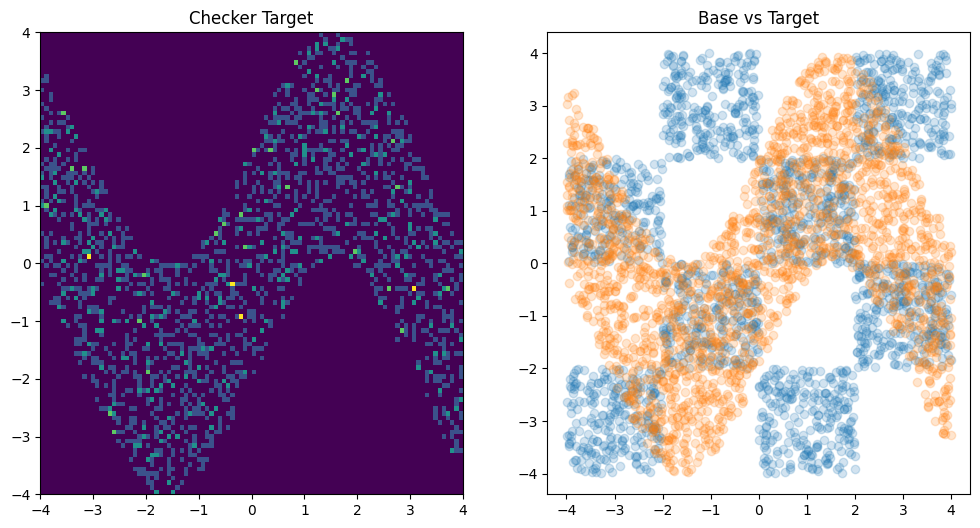

Target Batch Shape: (2000, 2)
Base Batch Shape: (2000, 2)


In [15]:
def init(bs):
    x1 = torch.rand(bs) * 4 - 2
    x2_ = torch.rand(bs) - torch.randint(2, (bs,)) * 2
    x2 = x2_ + (torch.floor(x1) % 2)
    return (torch.cat([x1[:, None], x2[:, None]], 1) * 2)



def target(bs):
    x1 = torch.rand(bs) * 4 - 2
    x2_ = torch.rand(bs) * 4 - 2
    x2 = 1/2*x2_ + torch.sin(x1 * 2)
    return torch.cat([x1[:, None], x2[:, None]], 1) * 2




def grab(var):
    return var.detach().cpu().numpy()

class SampleDataset(Dataset):
    def __init__(self, distribution, size):
        self.distribution = distribution
        self.size = size

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        return self.distribution(1).squeeze(0)


ndim = 2
batch_size = 2000
dataset_size = 20000


target_distribution = target
base_distribution = init

target_dataset = SampleDataset(target_distribution, dataset_size)
base_dataset = SampleDataset(base_distribution, dataset_size)

target_loader = DataLoader(target_dataset, batch_size=batch_size, shuffle=True)
base_loader = DataLoader(base_dataset, batch_size=batch_size, shuffle=True)

target_samples = next(iter(target_loader)).numpy()
base_samples = next(iter(base_loader)).numpy()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist2d(target_samples[:, 0], target_samples[:, 1], bins=100, range=[[-4, 4], [-4, 4]])
ax[0].set_title("Checker Target")

ax[1].scatter(base_samples[:, 0], base_samples[:, 1], label='base', alpha=0.2)
ax[1].scatter(target_samples[:, 0], target_samples[:, 1], alpha=0.2)
ax[1].set_title("Base vs Target")

plt.show()

print("Target Batch Shape:", target_samples.shape)
print("Base Batch Shape:", base_samples.shape)


In [16]:
def train(epochs, b, eta, data_loader, loss_b,loss_eta, opt_b, opt_eta, sched_b, sched_eta, device):
    n = len(data_loader)
    b.train()
    eta.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for x1 in data_loader:
            x1 = x1.to(device)
            x0 = base_distribution(x1.shape[0]).to(device)
            ts  = torch.rand(size=(x1.shape[0],)).to(device)
            loss_b_val = make_loss(loss_b, b,  x0, x1, ts, interpolant)
            loss_eta_val = make_loss(loss_eta, eta, x0, x1, ts, interpolant)
            loss = loss_b_val + loss_eta_val
            epoch_loss += loss.item()/n
            opt_b.zero_grad()
            opt_eta.zero_grad()
            loss_b_val.backward()
            loss_eta_val.backward()
            opt_b.step()
            opt_eta.step()
            sched_b.step()
            sched_eta.step()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss}')



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ndim = 2
hidden_dims = [256, 256, 256,256]
time_embed_dim = 64
b = FullyConnectedModel(input_dim=ndim, hidden_dims=hidden_dims, output_dim=ndim, time_embed_dim=time_embed_dim).to(device)
eta = FullyConnectedModel(input_dim=ndim, hidden_dims=hidden_dims, output_dim=ndim, time_embed_dim=time_embed_dim).to(device)

base_lr  = 2e-3
opt_b     = torch.optim.Adam(  b.parameters(), lr=base_lr)
opt_eta   = torch.optim.Adam(eta.parameters(), lr=base_lr)
sched_b   = torch.optim.lr_scheduler.StepLR(optimizer=  opt_b, step_size=1500, gamma=0.4)
sched_eta = torch.optim.lr_scheduler.StepLR(optimizer=opt_eta, step_size=1500, gamma=0.4)


epochs = 20
path = 'linear'
interpolant  = Interpolant(path=path, gamma_type='brownian')
loss_b = loss_per_sample_b
loss_eta = loss_per_sample_eta
train(epochs, b, eta,  target_loader,loss_b, loss_eta, opt_b, opt_eta, sched_b, sched_eta, device)

Epoch 1/10, Loss: -0.5298022113274783
Epoch 2/10, Loss: -1.6668902754783632
Epoch 3/10, Loss: -1.9180046081542967
Epoch 4/10, Loss: -2.037291872501373
Epoch 5/10, Loss: -2.200980305671692
Epoch 6/10, Loss: -2.1998255014419557
Epoch 7/10, Loss: -2.3765534400939936
Epoch 8/10, Loss: -2.3049683809280395
Epoch 9/10, Loss: -2.462420034408569
Epoch 10/10, Loss: -2.3716028690338136


(5000, 2)


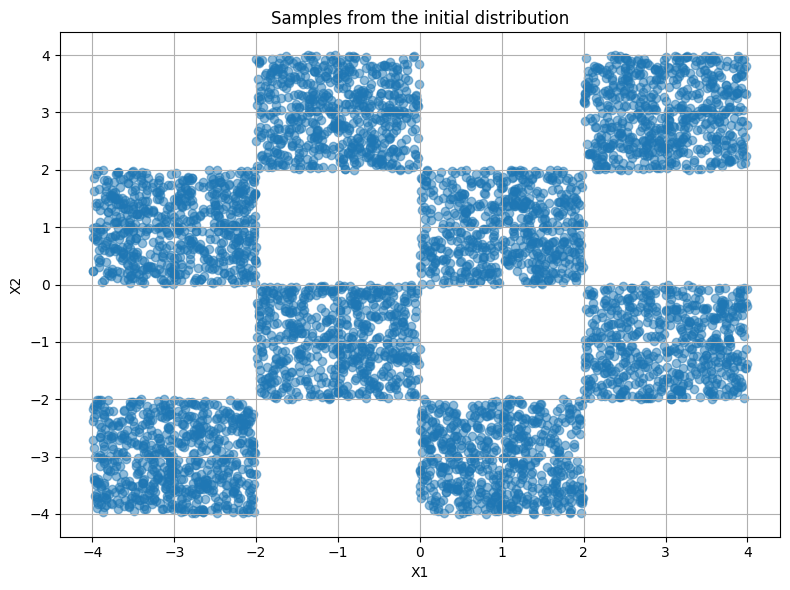

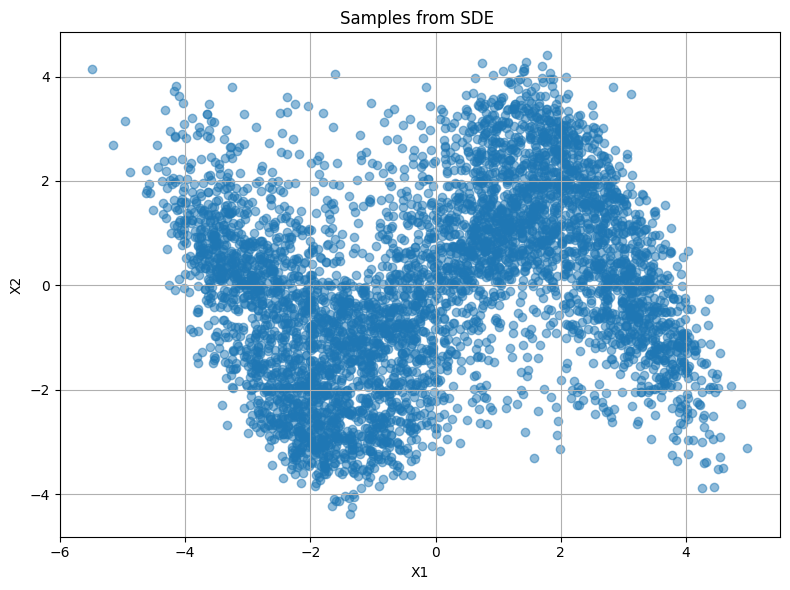

In [17]:
s = SFromEta(eta, interpolant.gamma)

sde_flow = SDEIntegrator(b=b, s=s, eps=torch.tensor(0.1), n_save=4, start_end=(0.0001, 0.999), n_step=100).to(device)
bs = 5000
with torch.no_grad():
    x0_tests  = base_distribution(bs).to(device)
    xfs_sde   = sde_flow.rollout_forward(x0_tests, 'heun')
    xf_sde    = grab(xfs_sde[-1].squeeze())
    x0=grab(x0_tests.squeeze())
    print(xf_sde.shape)
plt.figure(figsize=(8, 6))
plt.scatter(x0[:, 0], x0[:, 1], alpha=0.5)
plt.title('Samples from the initial distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(xf_sde[:, 0], xf_sde[:, 1], alpha=0.5)
plt.title('Samples from SDE ')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.tight_layout()
plt.show()




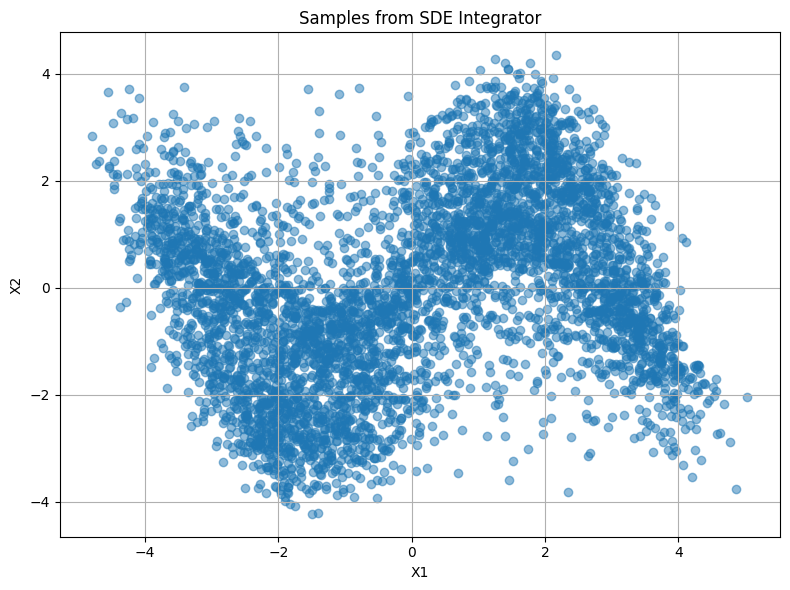

(5000, 2)


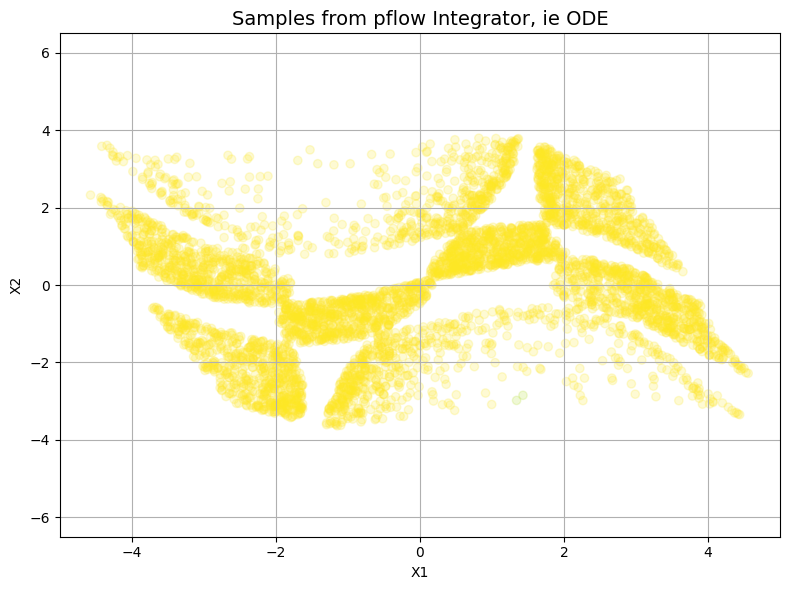

In [18]:
s = SFromEta(eta, interpolant.gamma)

sde_flow = SDEIntegrator(b=b, s=s, eps=torch.tensor(0.1), n_save=4, start_end=(0.0001, 0.999), n_step=100).to(device)
pflow = PFlowIntegrator(b=b,  method='dopri5', interpolant=interpolant, n_step=3)
bs = 5000
with torch.no_grad():
    x0_tests  = base_distribution(bs).to(device)
    xfs_sde   = sde_flow.rollout_forward(x0_tests, 'heun')
    xf_sde    = grab(xfs_sde[-1].squeeze())
    xfs_pflow, dlogp_pflow = pflow.rollout(x0_tests)
    xf_pflow               = grab(xfs_pflow[-1].squeeze())


plt.figure(figsize=(8, 6))
plt.scatter(xf_sde[:, 0], xf_sde[:, 1], alpha=0.5)
plt.title('Samples from SDE Integrator')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.tight_layout()
plt.show()
print(xf_sde.shape)

plt.figure(figsize=(8, 6))
plt.scatter(
    xf_pflow[:, 0], xf_pflow[:, 1],
    c=grab(torch.exp(dlogp_pflow[-1].squeeze()).detach()),
    vmin=0.0, vmax=0.05, alpha=0.2
)
plt.xlim(-5, 5)
plt.ylim(-6.5, 6.5)
plt.title('Samples from pflow Integrator, ie ODE', fontsize=14)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.tight_layout()
plt.show()